## Advesarial Sample

In this notebook, we derive an advesarial sample from a trained character recognition model. The goal is to use the sample input to fool the model.

## Step 1. Loading prerequisite packages and data

In [2]:
from sklearn.svm import SVC
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import SklearnClassifier
from art.utils import load_mnist

# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Flatten dataset

nb_samples_train = x_train.shape[0]
nb_samples_test = x_test.shape[0]
x_train = x_train.reshape((nb_samples_train, 28 * 28))
x_test = x_test.reshape((nb_samples_test, 28 * 28))

### Plotting First Input (X)

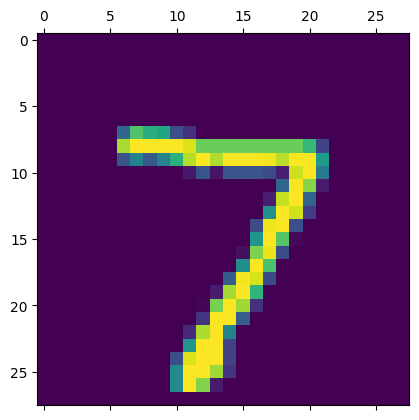

In [3]:
import matplotlib.pyplot as plt
plt.matshow(x_test[0].reshape((28,28)))

## Associated Y

In [4]:
print("Value:", np.where(y_test[0] == 1)[0][0])

Value: 7


## Step 2. Create & Train Model
*Note*: This may take some time!

In [7]:
# Step 2a: Create the support vector model
model = SVC(C=1.0, kernel="rbf")

# Step 2b: Create the ART classifier
classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))

# Step 2c: Train the ART classifier
classifier.fit(x_train, y_train)

## Test the Trained Model

In [8]:
# Step 2d: Use the model to predict the example value
p = classifier.predict([x_test[0]])
print("Prediction:", np.where(p == 1)[1][0])

Prediction: 7


## Evaluate Trained Model Accuracy

In [ ]:
# Step 2e: Evaluate the ART classifier on benign test examples
predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on begning test data: {}%".format(accuracy * 100))

## Step 3. Generate Adversarial Sample

In [ ]:
# Step 3: Generate adversarial sample
attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=x_test)

In [ ]:
plt.matshow(x_test_adv[0].reshape((28,28)))

## Step 4. Test Trained Model on Advesarial Sample

In [ ]:
import numpy as np
p = classifier.predict([x_test_adv[0]])
print("Prediction:", np.where(p == 1)[1][0])

## Step 5: Evaluate the Trained Classifier on Adversarial Test Sample

In [ ]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test sample: {}%".format(accuracy * 100))